# Exploration of the Contaminants

## Aim
Explore the contaminants found in the violations, examine their distribution and importance.  

In [220]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime


1. slack @fpaupier for db_user and password  
2.1  Download Google SDK:   
        Linux: https://cloud.google.com/sdk/docs/quickstart-linux  
        Windows: https://cloud.google.com/sdk/docs/quickstart-windows  
        macOS: https://cloud.google.com/sdk/docs/quickstart-macos  
2.2 from command line `gcloud auth login`  
2.3 from command line `gcloud init`  
3.1 install https://cloud.google.com/sql/docs/mysql/quickstart-proxy-test#install-proxy  
3.2 __run sql cloud proxy " ./cloud_sql_proxy -instances=safe-water-235819:us-east1:safe-water-db=tcp:3306__ " 
4. pip install MySQLdb  

In [221]:
db_user= ''
password= ''
db = pymysql.connect(host="127.0.0.1",    # your host, usually localhost
                     user=db_user,         # your username
                     passwd=password,  # your password
                     port=3307,
                     db = 'safe_water')        # name of the data base

In [222]:
cmd = """
show tables
"""
pd.read_sql(cmd, db)

,Tables_in_safe_water
0,CONTAMINANT_CODES
1,CONTAMINANT_GROUP_CODES
2,DG_LCR_SAMPLE_RESULT
3,ENFORCEMENT_ACTION
4,GEOGRAPHIC_AREA
5,LCR_SAMPLE
6,SERVICE_AREA
7,TREATMENT
8,VIOLATION
9,VIOLATION_ENF_ASSOC


In [223]:
cmd = """
SELECT *
FROM VIOLATION
LIMIT 5
"""
data = pd.read_sql(cmd, db)
data.head().T

,0,1,2,3,4
PWSID,MS0730004,NC0319125,NY1316696,WV3305539,FL3590699
ID,00000444-92b9-428b-9953-461a5adb95ad,000009c8-ac45-4739-9460-06b8b3bc1335,00000e0a-44f5-4809-8fa4-d03c59fe6030,0000114b-e6eb-4548-8b8a-350803638ca9,00001717-1a64-490d-a370-2e782643b91b
VIOLATION_ID,20414,4005,44051,60895,8510219
FACILITY_ID,33301,5004,,,
POPULATION_SERVED_COUNT,2553,60,104,123,773
NPM_CANDIDATE,N,N,N,N,N
PWS_ACTIVITY_CODE,A,I,A,A,I
PWS_DEACTIVATION_DATE,,22-DEC-16,,,22-JUN-12
PRIMARY_SOURCE_CODE,GW,GW,GW,GWP,GW
POP_CAT_5_CODE,2,1,1,1,2


In [1]:
cmd = """
SELECT *
FROM CONTAMINANT_CODES
LIMIT 5
"""
data = pd.read_sql(cmd, db)
data.head().T

NameError: name 'pd' is not defined

In [225]:
# the contaminants are coded. 
# here is a list to decode them:
contamin_codes = pd.read_csv('../../../data/sdwis/contaminant-codes.csv')
# later we will have to link this dataframe to the output of the query.
contamin_codes = contamin_codes[['CODE', 'NAME']] # probably only useful columns
contamin_codes.columns = ['CONTAMINANT_CODE', 'CONTAMINANT_NAME']

# before converting to int type, need to remove the 1***, types of contaminants
contamin_codes.CONTAMINANT_CODE = contamin_codes.CONTAMINANT_CODE.apply(lambda x: ''.join(list(filter(str.isdigit, x))))
contamin_codes.CONTAMINANT_CODE = contamin_codes.CONTAMINANT_CODE.astype(int)

contamin_codes.head().T


,0,1,2,3,4
CONTAMINANT_CODE,100,200,300,400,500
CONTAMINANT_NAME,TURBIDITY,SWTR,IESWTR,DBP STAGE 1,FILTER BACKWASH RULE


In [229]:
# there is another dataset needed to get the position of the water systems
pwsid_pos = pd.read_csv('../../../data/PWSID_coordinates.csv')
pwsid_pos.head().T

,0,1,2,3,4
PWSID,010106001,010109005,010307001,010502002,010502003
ZIP_CODE5,6339,6382,2535,2813,2813
LAT,41.4495,41.4572,41.3456,41.3853,41.3853
LON,-71.9823,-72.1146,-70.7515,-71.6681,-71.6681


In [236]:
# and another dataset needed to get the name of the violations code
# NOT SURE IF UP-TO-DATE, as of 2003.
# source is https://drive.google.com/drive/folders/1FbQE9_NP664lkz4d-Xu4omijLl-HNklz, p.125-126
viol_code = pd.read_csv('../../../data/sdwis/violation_code_2003.csv', dtype='object')
print(viol_code.dtypes)
viol_code.head().T

VIOLATION_CODE    object
violation_code    object
dtype: object


,0,1,2,3,4
VIOLATION_CODE,01,02,03,04,05
violation_code,"01 MCL, Single Sample","02 MCL, Average","03 Monitoring, Regular","04 Monitoring, Check/Repeat/Confirmation","05 Notification, State"


## Query to Get the Contaminants and Violations

In [232]:
cmd = """
SELECT
    ID,
    PWSID,
    VIOLATION_ID,
    POPULATION_SERVED_COUNT,
    CONTAMINANT_CODE,
    IS_MAJOR_VIOL_IND,
    COMPL_PER_BEGIN_DATE,
    VIOLATION_CODE,
    IS_HEALTH_BASED_IND,
    YEAR(COMPL_PER_BEGIN_DATE) AS year  
FROM
    VIOLATION
WHERE
    --IS_HEALTH_BASED_IND = 'Y' AND -- only the health-based violations
    YEAR(COMPL_PER_BEGIN_DATE) > 2009 AND 
    YEAR(COMPL_PER_BEGIN_DATE) < 2017  
"""
hb_violations = pd.read_sql(cmd, db)
print(hb_violations.shape)
print(hb_violations.dtypes)
hb_violations.head().T
# Note: -- Compliance Period Begin Date - represents the beginning of a period of time 
# when a public water system was in violation of a primary drinking water regulation. 
# This may also be the date when the public water system missed a monitoring event or 
# the date when the public water system failed to complete a required action (for example, 
# failing to install new treatment technology by a required date). 


(1043329, 10)
ID                         object
PWSID                      object
VIOLATION_ID               object
POPULATION_SERVED_COUNT     int64
CONTAMINANT_CODE            int64
IS_MAJOR_VIOL_IND          object
COMPL_PER_BEGIN_DATE       object
VIOLATION_CODE             object
IS_HEALTH_BASED_IND        object
year                        int64
dtype: object


,0,1,2,3,4
ID,00000444-92b9-428b-9953-461a5adb95ad,00000e0a-44f5-4809-8fa4-d03c59fe6030,0000114b-e6eb-4548-8b8a-350803638ca9,000023f4-a59e-4461-a816-70a3152e7142,0000494d-71f9-4ba2-9605-35149ff4ae91
PWSID,MS0730004,NY1316696,WV3305539,PA7010048,CO0145750
VIOLATION_ID,20414,44051,60895,1416332,2918023
POPULATION_SERVED_COUNT,2553,104,123,760,270
CONTAMINANT_CODE,4006,2982,2456,700,4000
IS_MAJOR_VIOL_IND,Y,Y,Y,N,
COMPL_PER_BEGIN_DATE,2010-07-01,2016-01-01,2012-01-01,2014-02-01,2013-01-01
VIOLATION_CODE,03,03,27,31,01
IS_HEALTH_BASED_IND,N,N,N,N,Y
year,2010,2016,2012,2014,2013


In [237]:
# we then need to link the violations to the contaminant codes
hb_viol = hb_violations.merge(contamin_codes, on='CONTAMINANT_CODE', how='left')

print(hb_viol.shape)
hb_viol.head().T

(1043329, 11)


,0,1,2,3,4
ID,00000444-92b9-428b-9953-461a5adb95ad,00000e0a-44f5-4809-8fa4-d03c59fe6030,0000114b-e6eb-4548-8b8a-350803638ca9,000023f4-a59e-4461-a816-70a3152e7142,0000494d-71f9-4ba2-9605-35149ff4ae91
PWSID,MS0730004,NY1316696,WV3305539,PA7010048,CO0145750
VIOLATION_ID,20414,44051,60895,1416332,2918023
POPULATION_SERVED_COUNT,2553,104,123,760,270
CONTAMINANT_CODE,4006,2982,2456,700,4000
IS_MAJOR_VIOL_IND,Y,Y,Y,N,
COMPL_PER_BEGIN_DATE,2010-07-01,2016-01-01,2012-01-01,2014-02-01,2013-01-01
VIOLATION_CODE,03,03,27,31,01
IS_HEALTH_BASED_IND,N,N,N,N,Y
year,2010,2016,2012,2014,2013


In [239]:
# we then link this dataset to the position:
_viol = hb_viol.merge(pwsid_pos, on='PWSID', how='left')

print(_viol.shape)
_viol.head().T

# WE NOW HAVE A DATA SET WITH ALL HEALTH-BASED VIOLATIONS FROM 2009-2016,
# with their location and the name of the contaminant: viol

(1043329, 14)


,0,1,2,3,4
ID,00000444-92b9-428b-9953-461a5adb95ad,00000e0a-44f5-4809-8fa4-d03c59fe6030,0000114b-e6eb-4548-8b8a-350803638ca9,000023f4-a59e-4461-a816-70a3152e7142,0000494d-71f9-4ba2-9605-35149ff4ae91
PWSID,MS0730004,NY1316696,WV3305539,PA7010048,CO0145750
VIOLATION_ID,20414,44051,60895,1416332,2918023
POPULATION_SERVED_COUNT,2553,104,123,760,270
CONTAMINANT_CODE,4006,2982,2456,700,4000
IS_MAJOR_VIOL_IND,Y,Y,Y,N,
COMPL_PER_BEGIN_DATE,2010-07-01,2016-01-01,2012-01-01,2014-02-01,2013-01-01
VIOLATION_CODE,03,03,27,31,01
IS_HEALTH_BASED_IND,N,N,N,N,Y
year,2010,2016,2012,2014,2013


In [240]:
# and finally to the violations codes
viol = _viol.merge(viol_code, on='VIOLATION_CODE', how='left').

print(viol.shape)
viol.head().T

(1043329, 15)


,0,1,2,3,4
ID,00000444-92b9-428b-9953-461a5adb95ad,00000e0a-44f5-4809-8fa4-d03c59fe6030,0000114b-e6eb-4548-8b8a-350803638ca9,000023f4-a59e-4461-a816-70a3152e7142,0000494d-71f9-4ba2-9605-35149ff4ae91
PWSID,MS0730004,NY1316696,WV3305539,PA7010048,CO0145750
VIOLATION_ID,20414,44051,60895,1416332,2918023
POPULATION_SERVED_COUNT,2553,104,123,760,270
CONTAMINANT_CODE,4006,2982,2456,700,4000
IS_MAJOR_VIOL_IND,Y,Y,Y,N,
COMPL_PER_BEGIN_DATE,2010-07-01,2016-01-01,2012-01-01,2014-02-01,2013-01-01
VIOLATION_CODE,03,03,27,31,01
IS_HEALTH_BASED_IND,N,N,N,N,Y
year,2010,2016,2012,2014,2013


## Plot all violations on a map
* try Altair to plot: https://altair-viz.github.io/index.html
* https://altair-viz.github.io/gallery/one_dot_per_zipcode.html
* else, go back to geopandas: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972


In [14]:
import vega
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

# iris = data.iris()

# alt.Chart(iris).mark_point().encode(
#     x='petalLength',
#     y='petalWidth',
#     color='species'
# )

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


## Plot some contaminants on the map
preferentially small multiples.

## Violations by date

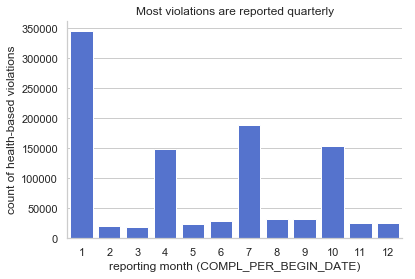

In [198]:
# By MONTH
viol['COMPL_PER_BEGIN_MONTH'] = pd.DatetimeIndex(viol['COMPL_PER_BEGIN_DATE']).month

viol_by_month = viol.groupby('COMPL_PER_BEGIN_MONTH').count().VIOLATION_ID.reset_index()

p = sns.barplot(x='COMPL_PER_BEGIN_MONTH', y='VIOLATION_ID', data=viol_by_month, color='royalblue')
p.set(xlabel='reporting month (COMPL_PER_BEGIN_DATE)', ylabel='count of health-based violations', 
      title = 'Most violations are reported quarterly')
sns.despine()
plt.show()

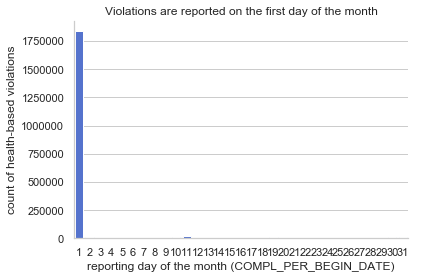

In [184]:
# By DAY
viol['COMPL_PER_BEGIN_DAY'] = pd.DatetimeIndex(viol['COMPL_PER_BEGIN_DATE']).day

viol_by_day = viol.groupby('COMPL_PER_BEGIN_DAY').count().VIOLATION_ID.reset_index()

p = sns.barplot(x='COMPL_PER_BEGIN_DAY', y='VIOLATION_ID', data=viol_by_day, color='royalblue')
p.set(xlabel='reporting day of the month (COMPL_PER_BEGIN_DATE)', ylabel='count of health-based violations', 
      title = 'Violations are reported on the first day of the month')
sns.despine()
plt.show()

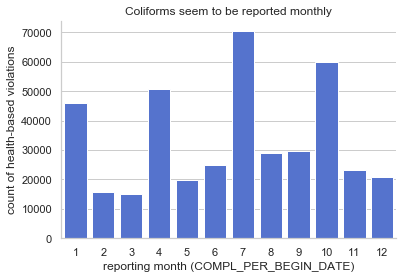

In [185]:
# Looking at the coliforms:
coliforms = viol[viol["CONTAMINANT_CODE"] == 3100]
coliforms.head()

coliforms_by_month = coliforms.groupby('COMPL_PER_BEGIN_MONTH').count().VIOLATION_ID.reset_index()

p = sns.barplot(x='COMPL_PER_BEGIN_MONTH', y='VIOLATION_ID', data=coliforms_by_month, color='royalblue')
p.set(xlabel='reporting month (COMPL_PER_BEGIN_DATE)', ylabel='count of health-based violations', 
      title = 'Coliforms seem to be reported monthly')
sns.despine()
plt.show()

# g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
# >>> g = g.map(plt.hist, "total_bill", bins=bins)

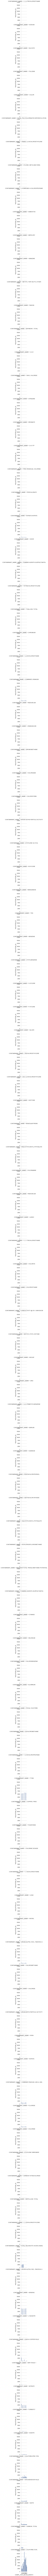

In [160]:
# NOT WORKING YET ...
viol_by_month_cont = viol.groupby(['COMPL_PER_BEGIN_MONTH', 'CONTAMINANT_NAME']).count().VIOLATION_ID.reset_index().sort_values(by='VIOLATION_ID')

g = sns.FacetGrid(viol_by_month_cont, row="CONTAMINANT_NAME", aspect=0.5)
# g = sns.FacetGrid(top_ten)

g = g.map(sns.barplot, 'COMPL_PER_BEGIN_MONTH', 'VIOLATION_ID')
# g = g.map(sns.barplot(x='COMPL_PER_BEGIN_MONTH', y='VIOLATION_ID', data=top_ten))
# p.set(xlabel='reporting month (COMPL_PER_BEGIN_DATE)', ylabel='count of health-based violations', 
#       title = 'Violations seem to be usually reported quarterly')
sns.despine()
plt.show()

# g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
# >>> g = g.map(plt.hist, "total_bill", bins=bins)

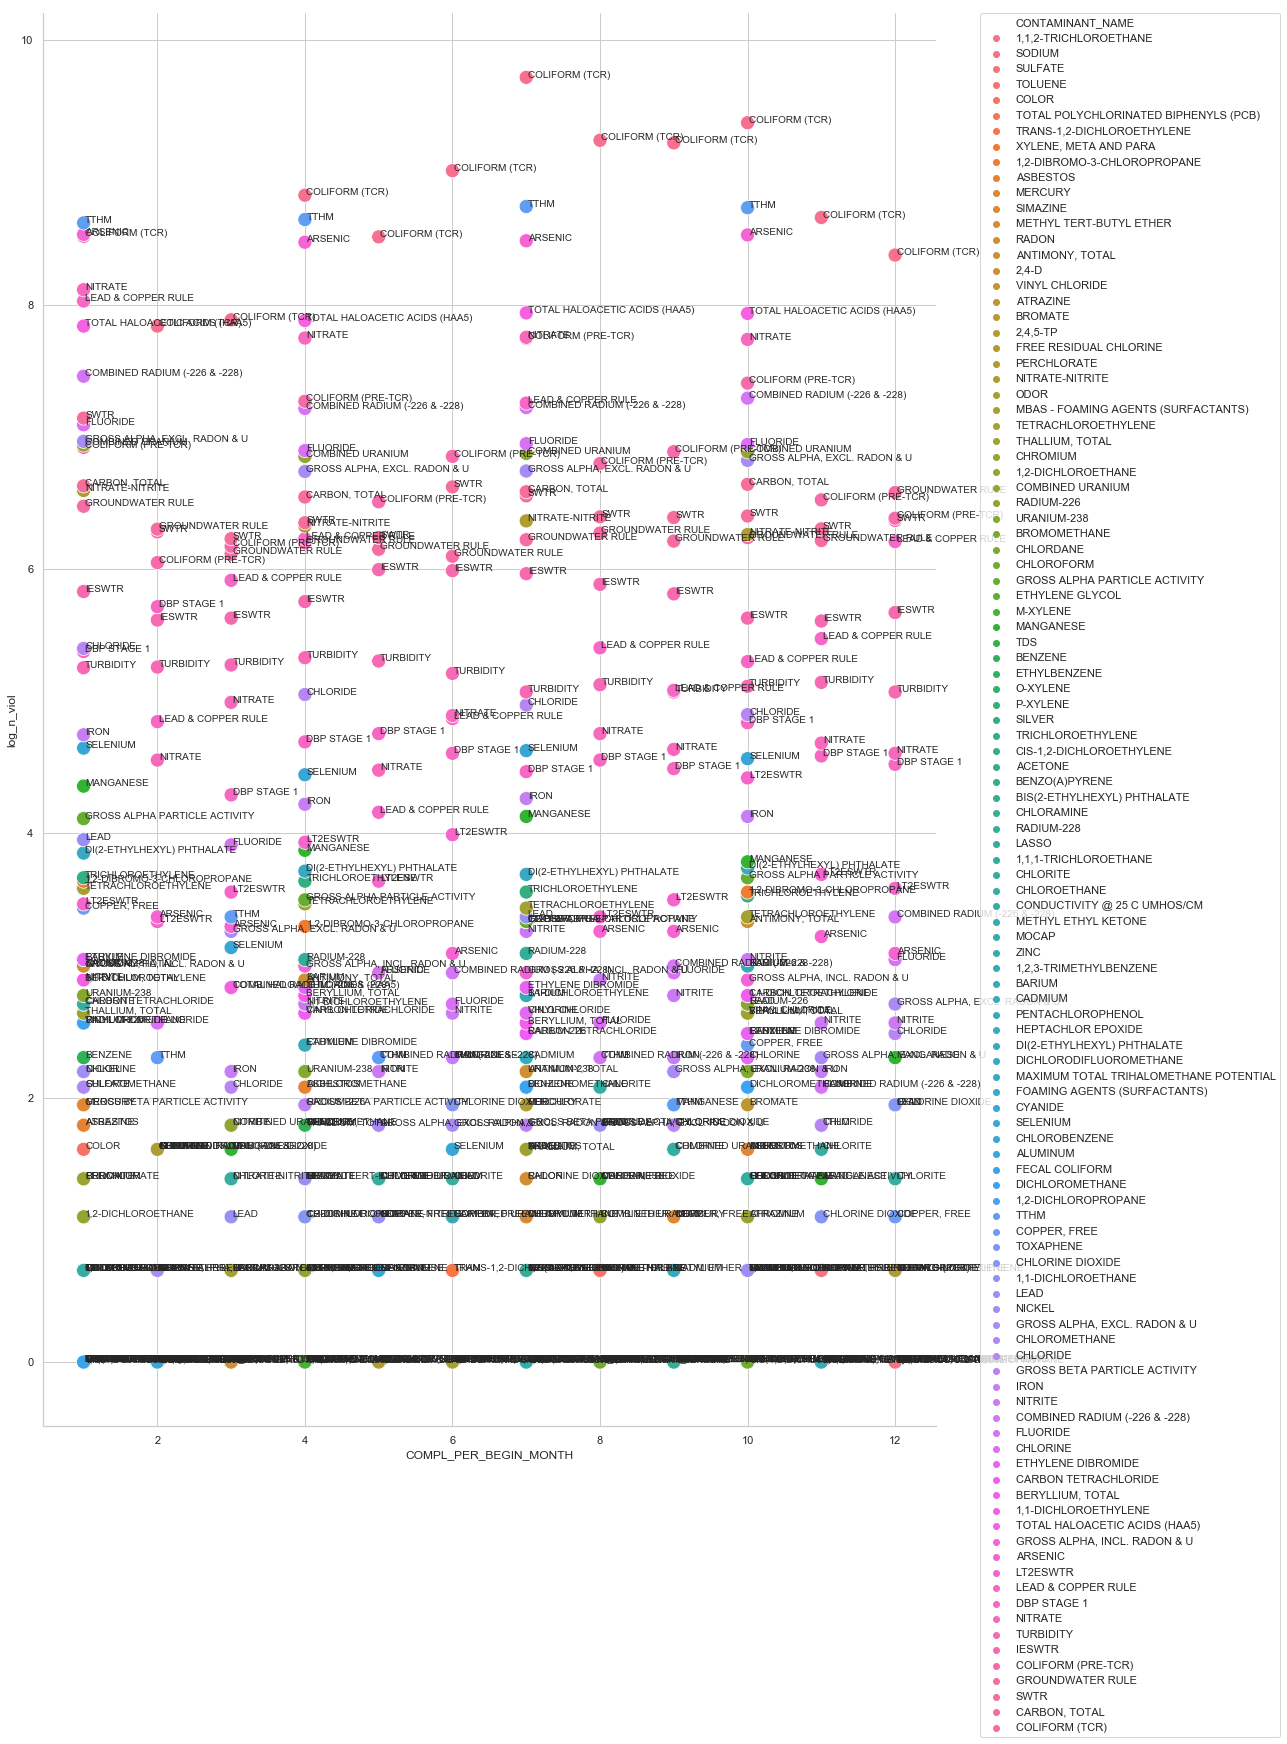

In [161]:
viol_by_month_cont['log_n_viol'] = np.log(viol_by_month_cont['VIOLATION_ID'])

sns.set_style("whitegrid")
plt.figure(figsize=(16, 26))
ax = sns.scatterplot(x="COMPL_PER_BEGIN_MONTH", y="log_n_viol", hue="CONTAMINANT_NAME", data=viol_by_month_cont,
                    s=200)
# g = sns.lineplot(x="COMPL_PER_BEGIN_MONTH", y="log_n_viol", hue="CONTAMINANT_NAME", data=viol_by_month_cont)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)#  Put the legend out of the figure

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(viol_by_month_cont.COMPL_PER_BEGIN_MONTH, viol_by_month_cont.log_n_viol, 
            viol_by_month_cont.CONTAMINANT_NAME, plt.gca())
p.set(xlabel='reporting month (COMPL_PER_BEGIN_DATE)', ylabel='LOG count of health-based violations', 
      title = 'log(number) of hb-violations by month for each contaminant')
sns.despine()
plt.show()

In [162]:
# plt.figure(figsize=(16, 5))

viol_by_month_cont.CONTAMINANT_NAME.value_counts()
# plt.xticks(rotation=90)
# plt.show()


IRON                                      12
TTHM                                      12
TURBIDITY                                 12
LEAD                                      12
LT2ESWTR                                  12
FLUORIDE                                  12
SWTR                                      12
DBP STAGE 1                               12
IESWTR                                    12
GROUNDWATER RULE                          12
LEAD & COPPER RULE                        12
NITRATE                                   12
MANGANESE                                 12
NITRITE                                   12
COMBINED URANIUM                          12
CHLORINE DIOXIDE                          12
GROSS ALPHA, EXCL. RADON & U              12
COLIFORM (TCR)                            12
ARSENIC                                   12
COLIFORM (PRE-TCR)                        12
CHLORIDE                                  12
CHLORITE                                  12
COMBINED R

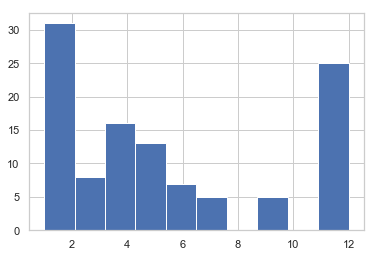

In [206]:
viol_by_month_cont.CONTAMINANT_NAME.value_counts().hist()



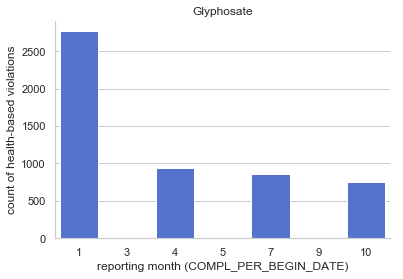

In [216]:
# look at glyphosate:
cont = viol[viol["CONTAMINANT_NAME"] == 'GLYPHOSATE']
cont = viol[viol["CONTAMINANT_NAME"] == 'ATRAZINE']



cont_by_month = cont.groupby('COMPL_PER_BEGIN_MONTH').count().VIOLATION_ID.reset_index()

p = sns.barplot(x='COMPL_PER_BEGIN_MONTH', y='VIOLATION_ID', data=cont_by_month, color='royalblue')
p.set(xlabel='reporting month (COMPL_PER_BEGIN_DATE)', ylabel='count of health-based violations', 
      title = 'Glyphosate')
sns.despine()
plt.show()

In [207]:
# cont = viol[viol["CONTAMINANT_NAME"] == 'ATRAZINE']
cont = viol[viol["CONTAMINANT_NAME"] == 'GLYPHOSATE']
cont


,ID,PWSID,VIOLATION_ID,POPULATION_SERVED_COUNT,CONTAMINANT_CODE,IS_MAJOR_VIOL_IND,COMPL_PER_BEGIN_DATE,IS_HEALTH_BASED_IND,year,CONTAMINANT_NAME,ZIP_CODE5,LAT,LON,COMPL_PER_BEGIN_MONTH
47,00037596-cb13-40d0-acbb-de444f0ac4b4,CT0969223,17889,94,2034,Y,2011-01-01,N,2011,GLYPHOSATE,6776.0,41.581494,-73.413130,1
209,000ea424-6b39-43e7-8782-ccf6c2030fff,ID7410042,326,50,2034,Y,2014-07-01,N,2014,GLYPHOSATE,83422.0,43.726688,-111.114840,7
654,002a2d6f-27b3-4499-90bd-05e1e81381f0,PA2080866,1330026,195,2034,Y,2013-04-01,N,2013,GLYPHOSATE,NaN,NaN,NaN,4
856,00363cba-2f91-4ee5-bcc6-1ab48bbb2d46,IL3096164,437679,160,2034,Y,2014-01-01,N,2014,GLYPHOSATE,61350.0,41.352630,-88.847340,1
1638,006547d2-a549-483c-a63e-0b3c4967265d,AS9721040,9721040032034102014,55,2034,Y,2014-10-01,N,2014,GLYPHOSATE,96799.0,-7.209975,-170.771600,10
2554,00a1f5f4-5bfa-4b83-a601-afcf581cc2fa,AK2280171,6022020,96,2034,Y,2016-04-01,N,2016,GLYPHOSATE,99558.0,62.632905,-160.213360,4
2631,00a79089-c47b-4181-8abd-479dec6900b2,105300133,446,207,2034,Y,2014-07-01,N,2014,GLYPHOSATE,98587.0,47.322510,-124.258140,7
2665,00a9f0bd-3cde-4174-8d76-7b759841be5f,PA2640054,1528531,62,2034,Y,2015-07-01,N,2015,GLYPHOSATE,18427.0,41.422497,-75.335384,7
3496,00dc5838-583e-4343-8f86-dc1cababe337,AK2271538,6837956,34,2034,Y,2010-04-01,N,2010,GLYPHOSATE,99559.0,60.766603,-161.880060,4
3682,00e814c9-5056-4082-b095-fdbc4f837ec0,PA3130851,1219617,400,2034,Y,2012-01-01,N,2012,GLYPHOSATE,18704.0,41.274748,-75.890760,1


In [218]:
viol.to_csv("violations_2009-2016.csv")
